In [1]:
import joblib
train_sentences = joblib.load('./train_sentences.sav')
print(train_sentences[0:5])

[list([2208, 402, 0, 186, 1614, 402, 0, 186])
 list([10, 52, 414, 32, 9542, 5, 39, 1509, 31, 4771, 3888, 43, 29, 4, 2, 438, 152, 9542, 5, 39, 1509, 0, 10, 1984, 12, 1])
 list([7746, 15001, 0, 2965, 1480, 4759, 5, 2473, 333, 78, 1254])
 list([6469, 0, 141, 282])
 list([1332, 6813, 7, 185, 8, 532, 8406, 2221, 7, 1085, 8])]


In [3]:
train_labels = joblib.load('./train_labels.sav')

In [4]:
word2idx = joblib.load('./word2idx.sav')
tag2idx = joblib.load('./tag2idx.sav')
idx2word = {i:w for (w,i) in word2idx.items()}

In [10]:
ii = 0 
for w,idx in word2idx.items():
    print("="*30)
    print(w,idx)
    print(idx2word[idx])
    ii+=1
    
    if ii > 10:
        break

, 0
,
. 1
.
the 2
the
of 3
of
in 4
in
to 5
to
a 6
a
( 7
(
) 8
)
and 9
and
" 10
"


In [22]:
idx2tag = {idx:tag for tag,idx in tag2idx.items()}
def sent_in_words(sent_in_indices):
    return [idx2word[idx] for idx in sent_in_indices]
def sents_in_words(sents_in_indices):
    return [sent_in_words(sent) for sent in sents_in_indices]

def tag_in_words(tag_in_indices):
    return [idx2tag[idx] for idx in tag_in_indices]
def tags_in_words(tags_in_indices):
    return [tag_in_words(tag) for tag in tags_in_indices]




In [17]:
sent_in_words(train_sentences[0])

['Jul', '31', ',', '1996', 'Jan', '31', ',', '1996']

In [21]:
tag_in_words(train_labels[0])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [23]:
batch_sentences = train_sentences[0:5]
batch_labels = train_labels[0:5]


In [24]:
sents_in_words(batch_sentences)

[['Jul', '31', ',', '1996', 'Jan', '31', ',', '1996'],
 ['"',
  'I',
  'think',
  'he',
  'deserves',
  'to',
  'be',
  'seeded',
  'as',
  'everybody',
  'else',
  'who',
  'is',
  'in',
  'the',
  'top',
  '16',
  'deserves',
  'to',
  'be',
  'seeded',
  ',',
  '"',
  'Stich',
  'said',
  '.'],
 ['Lead',
  '<UNK>',
  ',',
  'delivered',
  'consumer',
  '4.5',
  'to',
  '6.0',
  'cents',
  '/',
  'pound'],
 ['NORTHAMPTON', ',', 'England', '1996-08-30'],
 ['Alex',
  'Corretja',
  '(',
  'Spain',
  ')',
  'vs.',
  'Byron',
  'Black',
  '(',
  'Zimbabwe',
  ')']]

In [25]:
tags_in_words(batch_labels)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-PER',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-LOC', 'O', 'B-LOC', 'O'],
 ['B-PER',
  'I-PER',
  'O',
  'B-LOC',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'O',
  'B-LOC',
  'O']]

In [26]:
batch_labels

array([list([1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), list([5, 1, 5, 1]),
       list([3, 4, 1, 5, 1, 1, 3, 4, 1, 5, 1])], dtype=object)

In [10]:
from scipy import stats
e1 = stats.expon(scale=1,loc=3)
e2 = stats.expon(scale=0.05)


In [11]:
mean, var, skew, kurt = e1.stats(moments='mvsk')
print(mean, var)

mean, var, skew, kurt = e2.stats(moments='mvsk')
print(mean, var)


4.0 1.0
0.05 0.0025000000000000005


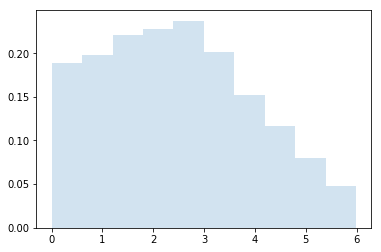

In [37]:
import matplotlib.pyplot as plt
mu = 0.5
scale=1
# r = stats.expon.rvs(loc=mu, scale=var, size=1000)
r = stats.truncnorm.rvs(-1, 2 ,loc=2,scale=2,size=2000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [ ]:
'c1': scipy.stats.truncnorm(0,5,loc=3,scale=2)